# Import Brazil weather files

Instructions: 

In this file I load the csv files I exported using google-earth script and build a weather divion panel data

In [3]:
# import brazil data downloaded using google earth
folder_path = "C:/Users/canzolbr/Documents/GitHub/Forecasting-World-Coffee-Prices/Data/Weather/google-earth/Brazil/"

output_file = "C:/Users/canzolbr/Documents/GitHub/Forecasting-World-Coffee-Prices/Data/Weather/"

In [4]:
import pandas as pd
import os
os.chdir(folder_path)

In [5]:
dir_list = os.listdir()
df = []
for file in dir_list:
    d = pd.read_csv(folder_path + file)
    df.append(d)

In [6]:
df_all = pd.concat(df,axis=0)

In [7]:
df_all = df_all.reset_index(drop=True)
df_all = df_all.drop('system:index',axis=1)

In [8]:
# brazilian states
df_all['state_name'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Mato Grosso Do Sul', 'Minas Gerais',
       'Name Unknown', 'Para', 'Paraiba', 'Parana', 'Pernambuco', 'Piaui',
       'Rio De Janeiro', 'Rio Grande Do Norte', 'Rio Grande Do Sul',
       'Rondonia', 'Roraima', 'Santa Catarina', 'Sao Paulo', 'Sergipe',
       'Tocantins'], dtype=object)

In [9]:
# create date vector
df_all['year'] = pd.to_numeric(df_all['year'])
df_all['month'] = pd.to_numeric(df_all['month'])

In [10]:
df_all['date'] = pd.to_datetime(dict(year = df_all['year'],
                                     month = df_all['month'], 
                                     day = 1))

In [11]:
df_all = df_all.set_index('date')

#### Check rainfall data for Minas Gerais, largest coffee producer estate in Brazil

In [12]:
df_mg = df_all[df_all['state_name']=='Minas Gerais']

In [13]:
df_mg

,month,state_code,state_name,year,yyyymm,.geo,precip_mm,t2m_c
date,,,,,,,,
1980-01-01,1,677,Minas Gerais,1980,198001,"{""type"":""MultiPoint"",""coordinates"":[]}",NaN,NaN
1980-02-01,2,677,Minas Gerais,1980,198002,"{""type"":""MultiPoint"",""coordinates"":[]}",NaN,NaN
1980-03-01,3,677,Minas Gerais,1980,198003,"{""type"":""MultiPoint"",""coordinates"":[]}",NaN,NaN
1980-04-01,4,677,Minas Gerais,1980,198004,"{""type"":""MultiPoint"",""coordinates"":[]}",NaN,NaN
1980-05-01,5,677,Minas Gerais,1980,198005,"{""type"":""MultiPoint"",""coordinates"":[]}",NaN,NaN
...,...,...,...,...,...,...,...,...
2025-08-01,8,677,Minas Gerais,2025,202508,"{""type"":""MultiPoint"",""coordinates"":[]}",7.878379,20.784574
2025-09-01,9,677,Minas Gerais,2025,202509,"{""type"":""MultiPoint"",""coordinates"":[]}",24.210159,23.032888
2025-10-01,10,677,Minas Gerais,2025,202510,"{""type"":""MultiPoint"",""coordinates"":[]}",53.332839,23.452001


<Axes: title={'center': 'Minas Gerais Anual Precipitation'}, xlabel='year'>

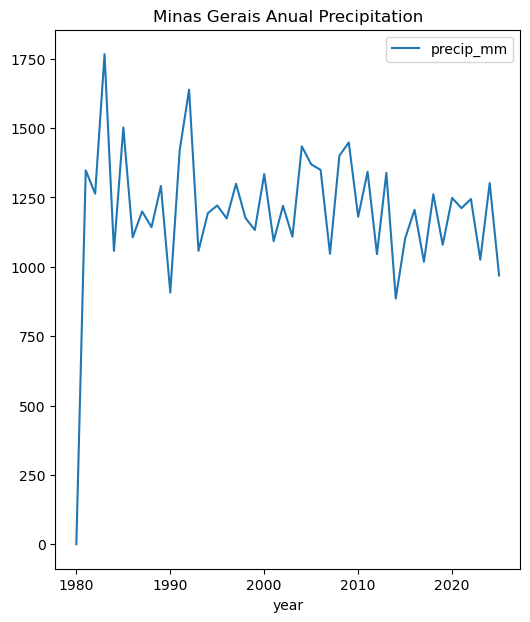

In [14]:
df_mg[['year','precip_mm']].groupby('year').sum().plot(figsize=(6,7), title='Minas Gerais Anual Precipitation')

<Axes: title={'center': 'Minas Gerais anual mean temperature'}, xlabel='year'>

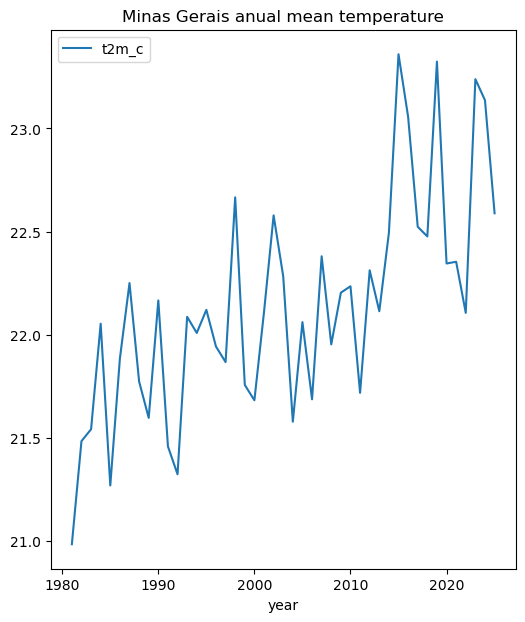

In [18]:
df_mg[['year','t2m_c']].groupby('year').mean().plot(figsize=(6,7), title='Minas Gerais anual mean temperature')

In [22]:
# filter an unknown state that is not relevant for coffee production
df_all = df_all[df_all['state_name']!='Name Unknown']

In [16]:
# drop 1980 data
df_all = df_all[df_all['year']>1980]

In [20]:
# save brazil weather data
df_all.to_csv(output_file + "br_weather.csv")